In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [16]:
dataset = pd.read_csv("./dataset/heart_statlog_cleveland_hungary_final.csv")

In [17]:
supporting_dataset = pd.read_csv("./dataset/additional_info_heart.csv")

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1189 non-null   int64  
 1   sex                  1189 non-null   int64  
 2   chest pain type      1189 non-null   int64  
 3   resting bp s         1189 non-null   int64  
 4   cholesterol          1189 non-null   int64  
 5   fasting blood sugar  1189 non-null   int64  
 6   resting ecg          1189 non-null   int64  
 7   max heart rate       1189 non-null   int64  
 8   exercise angina      1189 non-null   int64  
 9   oldpeak              1189 non-null   float64
 10  ST slope             1189 non-null   int64  
 11  target               1189 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.6 KB


In [19]:
renamed_supp_ds = supporting_dataset.rename(columns={"caa": "major_vessels", "thall": "thallium_ST"})

In [20]:
renamed_supp_ds

,major_vessels,thallium_ST
0,0,1
1,0,2
2,0,2
3,0,2
4,0,2
...,...,...
1184,2,3
1185,1,3
1186,0,3
1187,2,2


In [21]:
# joining the two data sets
# dataset-final --> dsf

dataset_list = [dataset, renamed_supp_ds]

final_dataframe = pd.concat(dataset_list, axis=1)

In [22]:
final_dataframe

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,major_vessels,thallium_ST
0,40,1,2,140,289,0,0,172,0,0.0,1,0,0,1
1,49,0,3,160,180,0,0,156,0,1.0,2,1,0,2
2,37,1,2,130,283,0,1,98,0,0.0,1,0,0,2
3,48,0,4,138,214,0,0,108,1,1.5,2,1,0,2
4,54,1,3,150,195,0,0,122,0,0.0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,57,0,4,140,241,0,0,123,1,0.2,2,1,2,3
1185,45,1,1,110,264,0,0,132,0,1.2,2,1,1,3
1186,68,1,4,144,193,1,0,141,0,3.4,2,1,0,3
1187,57,1,4,130,131,0,0,115,1,1.2,2,1,2,2


In [23]:
# checking the newly formed dataframe for anomalies

final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1189 non-null   int64  
 1   sex                  1189 non-null   int64  
 2   chest pain type      1189 non-null   int64  
 3   resting bp s         1189 non-null   int64  
 4   cholesterol          1189 non-null   int64  
 5   fasting blood sugar  1189 non-null   int64  
 6   resting ecg          1189 non-null   int64  
 7   max heart rate       1189 non-null   int64  
 8   exercise angina      1189 non-null   int64  
 9   oldpeak              1189 non-null   float64
 10  ST slope             1189 non-null   int64  
 11  target               1189 non-null   int64  
 12  major_vessels        1189 non-null   int64  
 13  thallium_ST          1189 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 130.2 KB


In [24]:
final_dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1189.0,53.733389,9.351015,28.0,47.0,54.0,60.0,77.0
sex,1189.0,0.763667,0.425008,0.0,1.0,1.0,1.0,1.0
chest pain type,1189.0,3.232969,0.935850,1.0,3.0,4.0,4.0,4.0
resting bp s,1189.0,132.148865,18.375769,0.0,120.0,130.0,140.0,200.0
cholesterol,1189.0,210.393608,101.457973,0.0,188.0,229.0,270.0,603.0
fasting blood sugar,1189.0,0.213625,0.410037,0.0,0.0,0.0,0.0,1.0
resting ecg,1189.0,0.698907,0.870489,0.0,0.0,0.0,2.0,2.0
max heart rate,1189.0,139.704794,25.510105,60.0,121.0,140.0,160.0,202.0
exercise angina,1189.0,0.387721,0.487435,0.0,0.0,0.0,1.0,1.0
oldpeak,1189.0,0.923549,1.086464,-2.6,0.0,0.6,1.6,6.2


In [31]:
# checking for the presence of null values
final_dataframe.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
major_vessels          0
thallium_ST            0
dtype: int64

In [32]:
#now we will divide the data into three categories 1) categorical data 2) Continuous data 3) target data

category_columns = [
    'sex',
    'chest pain type',
    'fasting blood sugar',
    'major_vessels',
    'resting ecg',
    'ST slope',
    'thallium_ST'
]

continuous_columns = [
    'age',
    'resting bp s',
    'cholesterol',
    'max heart rate',
    'oldpeak'
]

target_column = ['target']

In [33]:
final_dataframe[category_columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sex,1189.0,0.763667,0.425008,0.0,1.0,1.0,1.0,1.0
chest pain type,1189.0,3.232969,0.935850,1.0,3.0,4.0,4.0,4.0
fasting blood sugar,1189.0,0.213625,0.410037,0.0,0.0,0.0,0.0,1.0
major_vessels,1189.0,0.724138,1.023099,0.0,0.0,0.0,1.0,4.0
resting ecg,1189.0,0.698907,0.870489,0.0,0.0,0.0,2.0,2.0
ST slope,1189.0,1.624895,0.610447,0.0,1.0,2.0,2.0,3.0
thallium_ST,1189.0,2.316232,0.602392,0.0,2.0,2.0,3.0,3.0


In [34]:
fdf_corr = final_dataframe[continuous_columns].describe().transpose()
fdf_corr

,count,mean,std,min,25%,50%,75%,max
age,1189.0,53.733389,9.351015,28.0,47.0,54.0,60.0,77.0
resting bp s,1189.0,132.148865,18.375769,0.0,120.0,130.0,140.0,200.0
cholesterol,1189.0,210.393608,101.457973,0.0,188.0,229.0,270.0,603.0
max heart rate,1189.0,139.704794,25.510105,60.0,121.0,140.0,160.0,202.0
oldpeak,1189.0,0.923549,1.086464,-2.6,0.0,0.6,1.6,6.2


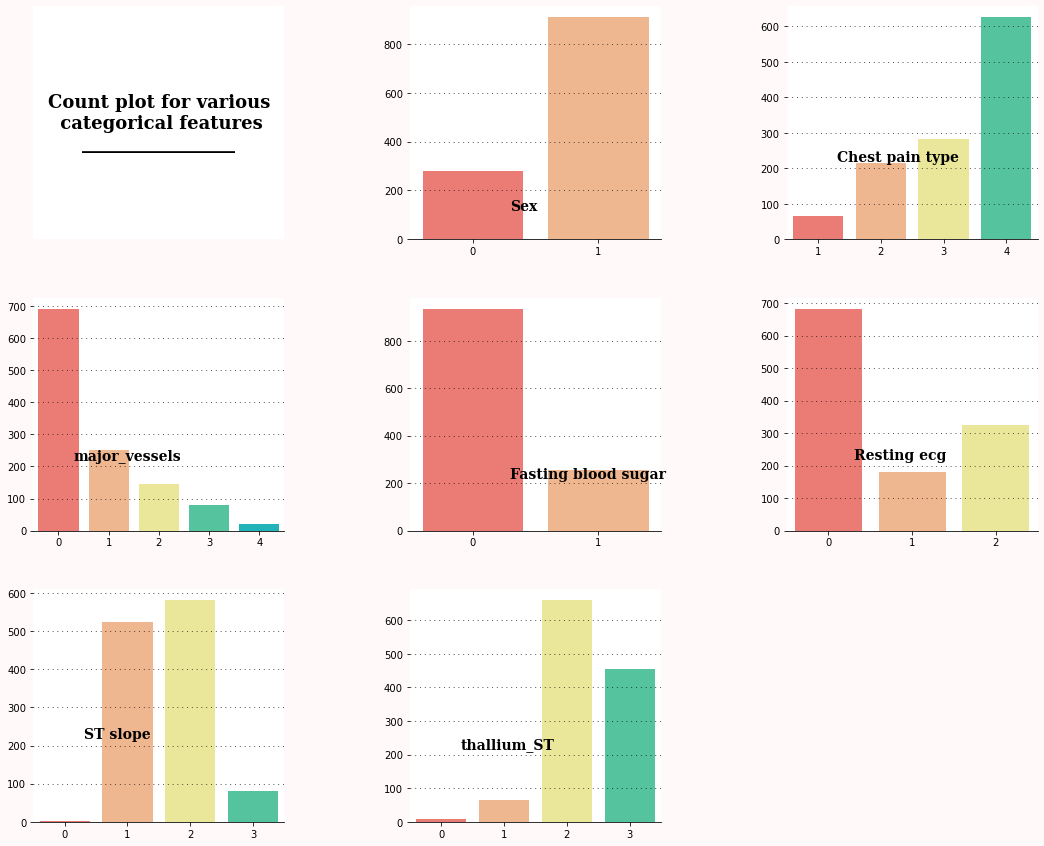

In [35]:
# plotting the count plot of the categorical data to see the distribution count of each category
fg = plt.figure(figsize=(18,15))

grid = fg.add_gridspec(3,3)

grid.update(wspace=0.5, hspace=0.25)

#registering each block of the grid

ax0 = fg.add_subplot(grid[0,0])
ax1 = fg.add_subplot(grid[0,1])
ax2 = fg.add_subplot(grid[0,2])
ax3 = fg.add_subplot(grid[1,0])
ax4 = fg.add_subplot(grid[1,1])
ax5 = fg.add_subplot(grid[1,2])
ax6 = fg.add_subplot(grid[2,0])
ax7 = fg.add_subplot(grid[2,1])

#setting the background color of the figure
fg.patch.set_facecolor("#fff9f9");

# setting color for each cell of the grid
grid_cell_bgcolor = "#FFFFFF"

countplot_colors = [
    "#ff6961",
    "#ffb480",
    "#f8f38d",
    "#42d6a4",
    "#08cad1",
    "#59adf6",
    "#9d94ff",
    "#c780e8"
]
ax0.set_facecolor(grid_cell_bgcolor)
ax1.set_facecolor(grid_cell_bgcolor)
ax2.set_facecolor(grid_cell_bgcolor)
ax3.set_facecolor(grid_cell_bgcolor)
ax4.set_facecolor(grid_cell_bgcolor)
ax5.set_facecolor(grid_cell_bgcolor)
ax6.set_facecolor(grid_cell_bgcolor)
ax7.set_facecolor(grid_cell_bgcolor)

# adding the title of all comparisons

ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
     'Count plot for various\n categorical features\n_________________',
     horizontalalignment='center',
     verticalalignment='center',
     fontsize=18, fontweight='bold',
     fontfamily='serif',
     color="#000000"
)

# adding the plot for the sex count of the data

ax1.text(
    0.3,
    120,
    'Sex',
    fontsize=14,
    fontweight='bold',
    fontfamily='serif',
    color="#000000"
)

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

sb.countplot(ax=ax1, data=final_dataframe, x='sex', palette=countplot_colors)

ax1.set_xlabel("")
ax1.set_ylabel("")

# adding the plot for the chest pain type

ax2.text(
    0.3,
    220,
    'Chest pain type',
    fontsize=14,
    fontweight='bold',
    fontfamily='serif',
    color="#000000"
)

ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

sb.countplot(ax=ax2, data=final_dataframe, x='chest pain type', palette=countplot_colors)

ax2.set_xlabel("")
ax2.set_ylabel("")

# adding the plot for the major_vessels

ax3.text(
    0.3,
    220,
    'major_vessels',
    fontsize=14,
    fontweight='bold',
    fontfamily='serif',
    color="#000000"
)

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

sb.countplot(ax=ax3, data=final_dataframe, x='major_vessels', palette=countplot_colors)

ax3.set_xlabel("")
ax3.set_ylabel("")

# adding the plot for the fasting blood sugar

ax4.text(
    0.3,
    220,
    'Fasting blood sugar',
    fontsize=14,
    fontweight='bold',
    fontfamily='serif',
    color="#000000"
)

ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

sb.countplot(ax=ax4, data=final_dataframe, x='fasting blood sugar', palette=countplot_colors)

ax4.set_xlabel("")
ax4.set_ylabel("")

# adding the plot for the fasting blood sugar

ax5.text(
    0.3,
    220,
    'Resting ecg',
    fontsize=14,
    fontweight='bold',
    fontfamily='serif',
    color="#000000"
)

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

sb.countplot(ax=ax5, data=final_dataframe, x='resting ecg',palette=countplot_colors)

ax5.set_xlabel("")
ax5.set_ylabel("")

# adding the plot for the ST slope

ax6.text(
    0.3,
    220,
    'ST slope',
    fontsize=14,
    fontweight='bold',
    fontfamily='serif',
    color="#000000"
)

ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

sb.countplot(ax=ax6, data=final_dataframe, x='ST slope', palette=countplot_colors)

ax6.set_xlabel("")
ax6.set_ylabel("")

# adding the plot for the thallium_ST

ax7.text(
    0.3,
    220,
    'thallium_ST',
    fontsize=14,
    fontweight='bold',
    fontfamily='serif',
    color="#000000"
)

ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

sb.countplot(ax=ax7, data=final_dataframe, x='thallium_ST', palette=countplot_colors)

ax7.set_xlabel("")
ax7.set_ylabel("")


# locating each plot of the figure created

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)

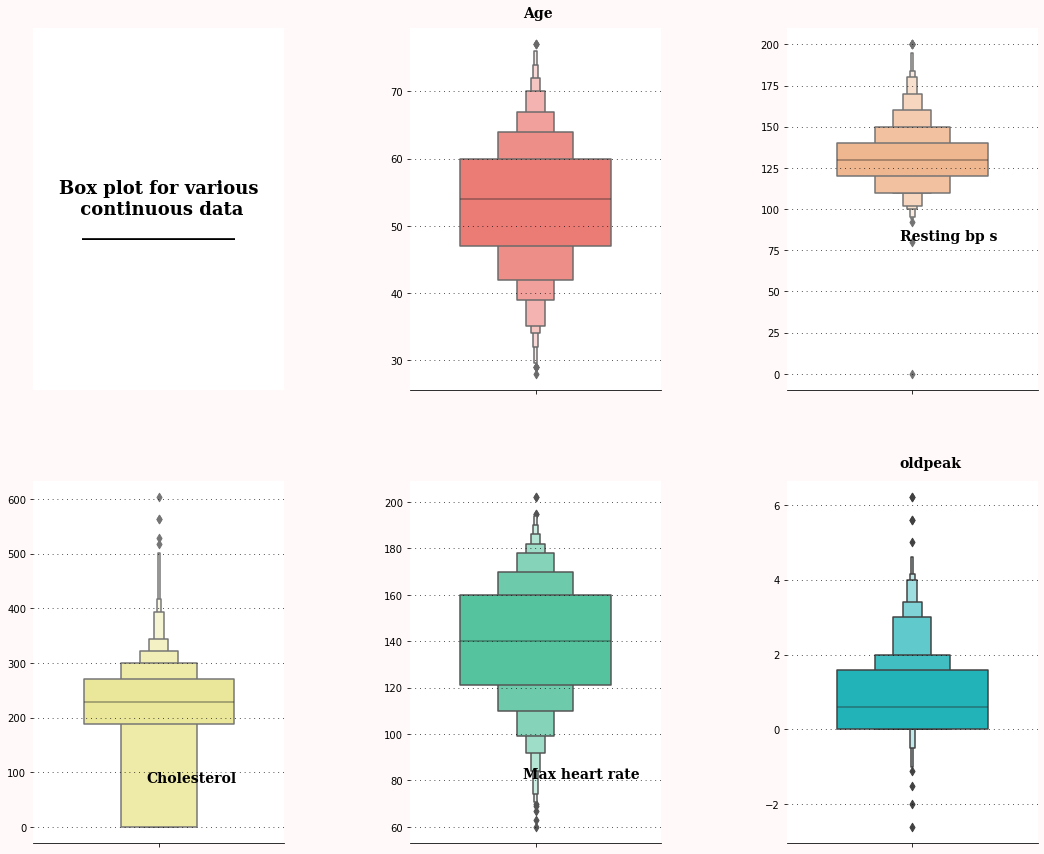

In [36]:
# plotting the box plot of the continuous data to see the distribution count of each category
fig = plt.figure(figsize=(18,15))

grid1 = fg.add_gridspec(2,3)

grid1.update(wspace=0.5, hspace=0.25)

#registering each block of the grid

cx0 = fig.add_subplot(grid1[0,0])

cx1 = fig.add_subplot(grid1[0,1])

cx2 = fig.add_subplot(grid1[0,2])

cx3 = fig.add_subplot(grid1[1,0])

cx4 = fig.add_subplot(grid1[1,1])

cx5 = fig.add_subplot(grid1[1,2])

#setting the background color of the figure

fig.patch.set_facecolor("#fff9f9");

# setting color for each cell of the grid

grid_cell_bgcolor = "#FFFFFF"

cx0.set_facecolor(grid_cell_bgcolor)

# Title of the plot
cx0.spines["bottom"].set_visible(False)

cx0.spines["left"].set_visible(False)

cx0.spines["top"].set_visible(False)

cx0.spines["right"].set_visible(False)

cx0.tick_params(left=False, bottom=False)

cx0.set_xticklabels([])

cx0.set_yticklabels([])

cx0.text(0.5,0.5,
     'Box plot for various\n continuous data\n_________________',
     horizontalalignment='center',
     verticalalignment='center',
     fontsize=18, fontweight='bold',
     fontfamily='serif',
     color="#000000"
)

# box plot for the data for field - Age 
cx1.text(
    -0.05,
    81,
    'Age',
    fontsize=14,
    fontweight='bold',
    fontfamily='serif', 
    color="#000000"
)

cx1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

sb.boxenplot(ax=cx1,y=final_dataframe['age'],palette=["#ff6961"],width=0.6)

cx1.set_xlabel("")
cx1.set_ylabel("")


# box plot for the data for field - Resting bp s 
cx2.text(
    -0.05,
    81,
    'Resting bp s',
    fontsize=14,
    fontweight='bold',
    fontfamily='serif',
    color="#000000"
)

cx2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

sb.boxenplot(ax=cx2,y=final_dataframe['resting bp s'],palette=["#ffb480"],width=0.6)

cx2.set_xlabel("")
cx2.set_ylabel("")

# box plot for the data for field - Cholesterol 
cx3.text(
    -0.05,
    81,
    'Cholesterol',
    fontsize=14,
    fontweight='bold',
    fontfamily='serif',
    color="#000000"
)

cx3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

sb.boxenplot(ax=cx3,y=final_dataframe['cholesterol'],palette=["#f8f38d"],width=0.6)

cx3.set_xlabel("")
cx3.set_ylabel("")

# box plot for the data for field - Max heart rate 
cx4.text(
    -0.05,
    81,
    'Max heart rate',
    fontsize=14,
    fontweight='bold',
    fontfamily='serif',
    color="#000000"
)

cx4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

sb.boxenplot(ax=cx4,y=final_dataframe['max heart rate'],palette=["#42d6a4"],width=0.6)

cx4.set_xlabel("")

cx4.set_ylabel("")

# box plot for the data for field - oldpeak

cx5.text(
    -0.05,
    7.0,
    'oldpeak',
    fontsize=14,
    fontweight='bold',
    fontfamily='serif',
    color="#000000"
)

cx5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

sb.boxenplot(ax=cx5,y=final_dataframe['oldpeak'],palette=["#08cad1"],width=0.6)

cx5.set_xlabel("")

cx5.set_ylabel("")

for s in ["top","right","left"]:
    cx1.spines[s].set_visible(False)
    cx2.spines[s].set_visible(False)
    cx3.spines[s].set_visible(False)
    cx4.spines[s].set_visible(False)
    cx5.spines[s].set_visible(False)

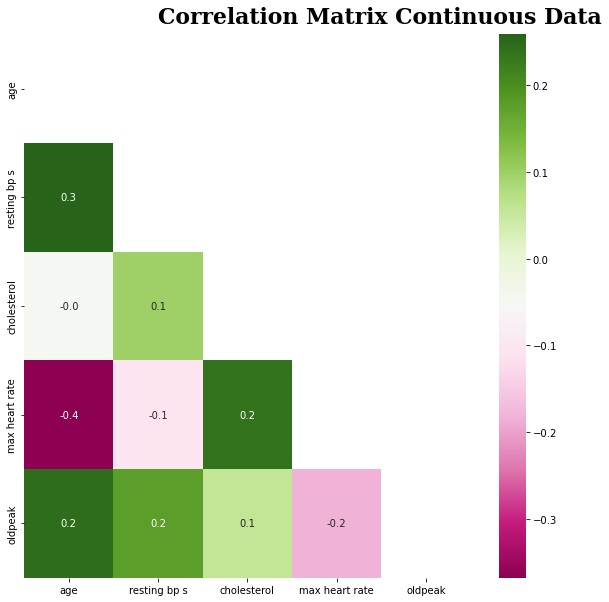

In [41]:
# creating the heatmap matrix of the continuous data


fig_corr = plt.figure(figsize=(10,10))

grid2 = fig_corr.add_gridspec(1,1)

grid2.update(wspace=0.3, hspace=0.15)

corr_x0 = fig_corr.add_subplot(grid2[0,0])

color_palette = ["#fc766aff","#5b84b1ff"]

mask = np.triu(np.ones_like(fdf_corr))

corr_x0.text(
    1.5,
    -0.1,
    "Correlation Matrix Continuous Data",
    fontsize=22,
    fontweight='bold',
    fontfamily='serif',
    color="#000000"
)

fdf_corr = final_dataframe[continuous_columns].corr().transpose()

sb.heatmap(fdf_corr, mask=mask, fmt=".1f", annot=True, cmap='PiYG')

plt.show()


<Figure size 864x864 with 0 Axes>

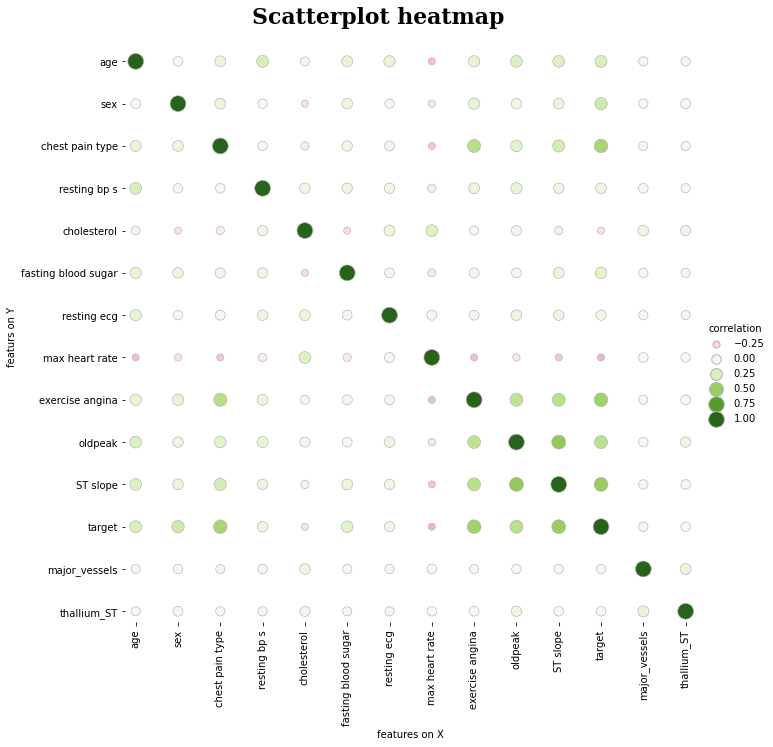

In [45]:
# creating the scatterplot of all the data from dataframe

fig_ac = plt.figure(figsize=(12,12))

corr_all = final_dataframe.corr().stack().reset_index(name="correlation")

rel_plot = sb.relplot(
    data=corr_all,
    x="level_0",
    y="level_1",
    hue="correlation",
    size="correlation",
    palette="PiYG",
    hue_norm=(-1, 1),
    edgecolor=".7",
    height=10,
    sizes=(50, 250),
    size_norm=(-.2, .8),
)

rel_plot.set(
    xlabel="features on X",
    ylabel="featurs on Y",
    aspect="equal"
)

rel_plot.fig.suptitle(
    'Scatterplot heatmap',
    fontsize=22,
    fontweight='bold',
    fontfamily='serif',
    color="#000000"
)

rel_plot.despine(left=True, bottom=True)

rel_plot.ax.margins(.02)


for label in rel_plot.ax.get_xticklabels():
    label.set_rotation(90)


for artist in rel_plot.legend.legendHandles:
    artist.set_edgecolor(".7")


plt.show()

In [91]:
! pip3 install torch torchvision

     |████████████████████████████████| 137.9 MB 4.2 MB/s eta 0:00:011     |██████████████████████████████▊ | 132.5 MB 1.9 MB/s eta 0:00:03
     |████████████████████████████████| 1.4 MB 6.2 MB/s eta 0:00:01


In [46]:
# importing supervised learning package for predictive analysis
from sklearn.preprocessing import RobustScaler

# importing Train Test Split package to split the sample data
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

print('This message confirms that all the packages were downloaded successfully...')

This message confirms that all the packages were downloaded successfully...


In [48]:
# creating a copy of final_dataframe
fnl_df = final_dataframe

# define the columns to be encoded and scaled
category_columns = [
    'sex',
    'chest pain type',
    'fasting blood sugar',
    'major_vessels',
    'resting ecg',
    'ST slope',
    'thallium_ST'
]

continuous_columns = [
    'age',
    'resting bp s',
    'cholesterol',
    'max heart rate',
    'oldpeak'
]

# encoding the categorical columns
fnl_df = pd.get_dummies(fnl_df, columns = category_columns, drop_first = True)

# defining the features and target
X = fnl_df.drop(['target'],axis=1)
y = fnl_df[['target']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous features
X[continuous_columns] = scaler.fit_transform(X[continuous_columns])

print("Below are the first 5 rows of X are")

X.head()

Below are the first 5 rows of X are


,age,resting bp s,cholesterol,max heart rate,exercise angina,oldpeak,sex_1,chest pain type_2,chest pain type_3,chest pain type_4,...,major_vessels_3,major_vessels_4,resting ecg_1,resting ecg_2,ST slope_1,ST slope_2,ST slope_3,thallium_ST_1,thallium_ST_2,thallium_ST_3
0,-1.076923,0.5,0.731707,0.820513,0,-0.3750,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,-0.384615,1.5,-0.597561,0.410256,0,0.2500,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,-1.307692,0.0,0.658537,-1.076923,0,-0.3750,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
3,-0.461538,0.4,-0.182927,-0.820513,1,0.5625,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,0.000000,1.0,-0.414634,-0.461538,0,-0.3750,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

print("Visualising the dataset after splitting into train set and test set---")
print("The shape of X_train is ----> ", X_train.shape)
print("The shape of X_test is  ----> ", X_test.shape)
print("The shape of y_train is ----> ", y_train.shape)
print("The shape of y_test is  ----> ", y_test.shape)

Visualising the dataset after splitting into train set and test set---
The shape of X_train is ---->  (951, 23)
The shape of X_test is  ---->  (238, 23)
The shape of y_train is ---->  (951, 1)
The shape of y_test is  ---->  (238, 1)


In [50]:
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train, y_train.values.ravel())

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.8445378151260504


In [51]:
svm = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(X_train, y_train.values.ravel())

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

The best params are : {'C': 1, 'gamma': 0.1}
The best score is   : 0.8611904105814274


In [52]:
# predicting the values
y_pred = searcher.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM after hyper-parameter tuning is  0.8739495798319328


In [53]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train.values.ravel())

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression is  0.8403361344537815
